# Health ChatBot Survey Data Analysis

In [112]:
#!pip install WordCloud

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# column names
names = ['id', 'start_time', 'completion_time', 'email', 'age_range', 'gender',
              'often_see_doctor', 'satisfaction', 'registration_steps', 'areas_to_improve', 
              'other_challenges', 'used_chatbot', 'expectations', 'short_interview', 'contact']

In [63]:
# import the dataset
df = pd.read_csv("survey.csv")
df.columns = names
df.head(2)

,id,start_time,completion_time,email,age_range,gender,often_see_doctor,satisfaction,registration_steps,areas_to_improve,other_challenges,used_chatbot,expectations,short_interview,contact
0,2,2/9/2023 20:49,2/9/2023 20:52,anonymous,26-35,Male,Sometimes,Neither satisfied nor dissatisfied,NaN,Long wait times;Lack of clear communication wi...,Some healthcare professionals are quite rude a...,No,NaN,NaN,NaN
1,3,2/9/2023 20:53,2/9/2023 20:56,anonymous,26-35,Male,Rarely,Neither satisfied nor dissatisfied,NaN,Long wait times;Difficulties in navigating the...,.,No,NaN,NaN,NaN


## Clean the data

In [64]:
# check column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  109 non-null    int64 
 1   start_time          109 non-null    object
 2   completion_time     109 non-null    object
 3   email               109 non-null    object
 4   age_range           109 non-null    object
 5   gender              109 non-null    object
 6   often_see_doctor    109 non-null    object
 7   satisfaction        109 non-null    object
 8   registration_steps  80 non-null     object
 9   areas_to_improve    109 non-null    object
 10  other_challenges    101 non-null    object
 11  used_chatbot        109 non-null    object
 12  expectations        25 non-null     object
 13  short_interview     80 non-null     object
 14  contact             28 non-null     object
dtypes: int64(1), object(14)
memory usage: 12.9+ KB


In [65]:
# drop unnecessary columns
df.drop(columns=['id', 'start_time', 'completion_time', 'email', 'contact', 'short_interview'], axis=1, inplace=True)
df.head()

,age_range,gender,often_see_doctor,satisfaction,registration_steps,areas_to_improve,other_challenges,used_chatbot,expectations
0,26-35,Male,Sometimes,Neither satisfied nor dissatisfied,NaN,Long wait times;Lack of clear communication wi...,Some healthcare professionals are quite rude a...,No,NaN
1,26-35,Male,Rarely,Neither satisfied nor dissatisfied,NaN,Long wait times;Difficulties in navigating the...,.,No,NaN
2,26-35,Female,Sometimes,Satisfied,depends on the hospitalYou get to the hospital...,Long wait times;,Some stuff non-challant attitude especially th...,No,NaN
3,26-35,Female,Rarely,Neither satisfied nor dissatisfied,Putting a call through to the medical personne...,Long wait times;Inefficient or confusing regis...,"In some big government hospital, you have to t...",No,NaN
4,26-35,Female,Sometimes,Satisfied,Got to the reception.\nWas asked to fill a hos...,I used to have the problem of long waiting tim...,They seem to give hmo users cheaper drugs\n,No,NaN


In [66]:
df.dtypes

age_range             object
gender                object
often_see_doctor      object
satisfaction          object
registration_steps    object
areas_to_improve      object
other_challenges      object
used_chatbot          object
expectations          object
dtype: object

In [67]:
# check missing values
df.isna().sum()

age_range              0
gender                 0
often_see_doctor       0
satisfaction           0
registration_steps    29
areas_to_improve       0
other_challenges       8
used_chatbot           0
expectations          84
dtype: int64

In [68]:
#remove the floating numbers
df['other_challenges'] = df['other_challenges'].astype(str)
df['registration_steps'] = df['registration_steps'].astype(str)
df['expectations'] = df['expectations'].astype(str)
df.isna().sum()

age_range             0
gender                0
often_see_doctor      0
satisfaction          0
registration_steps    0
areas_to_improve      0
other_challenges      0
used_chatbot          0
expectations          0
dtype: int64

## Analysis
1. How often do people see doctors / visit hospitals
2. Which gender visits hospitals more often
3. Are people satisfied with their hospital visits
4. Which age bracket visits the hospitals/ see doctors most freuently
5. How many people have used a chatbot before, does this vary accross genders and age brackets

Rarely        0.477064
Sometimes     0.449541
Often         0.064220
Very often    0.009174
Name: often_see_doctor, dtype: float64

<AxesSubplot:>

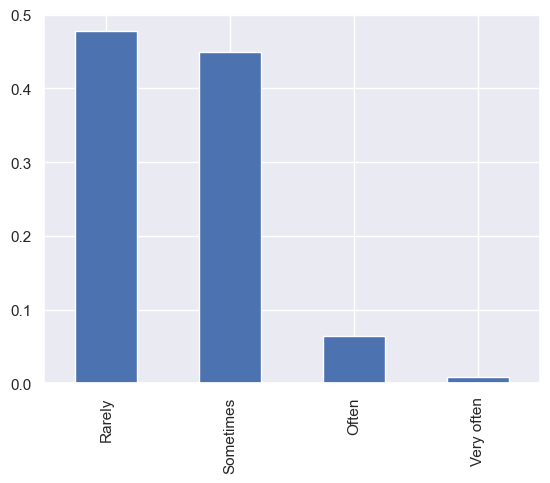

In [113]:
# How often do people see doctors / visit hospitals
display(df['often_see_doctor'].value_counts(normalize=True))
df['often_see_doctor'].value_counts(normalize=True).plot(kind='bar')

Text(0.5, 1.0, 'Hospital Visits by gender')

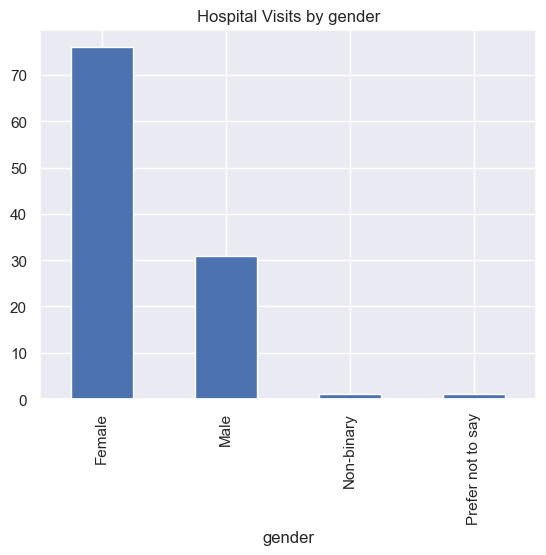

In [114]:
# Which gender visits hospitals more often
df.groupby('gender')['often_see_doctor'].count().plot(kind='bar')
plt.title("Hospital Visits by gender")

In [71]:
# Are people satisfied with their hospital visits
df['satisfaction'].value_counts(normalize=True)

Satisfied                             0.568807
Neither satisfied nor dissatisfied    0.284404
Dissatisfied                          0.100917
Very satisfied                        0.036697
Very dissatisfied                     0.009174
Name: satisfaction, dtype: float64

In [72]:
# Which age bracket visits the hospitals/ see doctors most freuently
df.groupby('age_range')[['often_see_doctor']].count()

,often_see_doctor
age_range,
16-25,28
26-35,62
36-45,19


In [73]:
# How many people have used a chatbot before, does this vary accross genders and age brackets
df.groupby(['gender', 'age_range'])[['used_chatbot']].count()

used_chatbot
gender            age_range              
Female            16-25                23
                  26-35                45
                  36-45                 8
Male              16-25                 5
                  26-35                16
                  36-45                10
Non-binary        36-45                 1
Prefer not to say 26-35                 1

## Observations
From our sample, we can observe that a good number of people visit hospitals with the majority being female.

A good number of people are not satified with the services at the hospitals with the majority citing long wait hours in the ueu and lack of access to proper information.

Most people have an idea or have used a chatbot before with majority being between ages of 26-35.


## Visualising Most frequently used words and multi-answer survey questions

Use wordcloud and stacking to count the most occuring keywords in these columns, this will help us identify the most isues that people experience while seeking medical attention and see how to optimize our chatbot.

Columns to analyse

1. registration_steps
2. areas_to_improve 
3. other_challenges

### Steps that need to be improved

In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import seaborn as sns

#set preferences
sns.set(color_codes=True)

In [75]:
all_comments = ''
for i in range(df.shape[0]):
    all_comments = all_comments + df['areas_to_improve'][i]

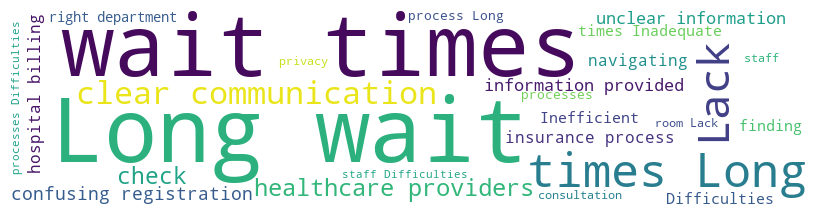

In [76]:
wordcloud = WordCloud(width = 800, height = 200, 
                background_color ='white', 
                min_font_size = 10).generate(all_comments) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 2), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [77]:
df["areas_to_improve"].head()

0    Long wait times;Lack of clear communication wi...
1    Long wait times;Difficulties in navigating the...
2                                     Long wait times;
3    Long wait times;Inefficient or confusing regis...
4    I used to have the problem of long waiting tim...
Name: areas_to_improve, dtype: object

In [78]:
long_wait = df["areas_to_improve"].str.contains('Long wait times')
long_wait.value_counts(normalize=True)

True     0.926606
False    0.073394
Name: areas_to_improve, dtype: float64

Almost 97 % of users want the wait time improved

In [79]:
areas_to_improve_lists = df["areas_to_improve"].str.split(';', expand=True)
areas_to_improve_lists.head()

,0,1,2,3,4,5,6,7
0,Long wait times,Lack of clear communication with healthcare pr...,,None,None,None,None,None
1,Long wait times,Difficulties in navigating the hospital billin...,,None,None,None,None,None
2,Long wait times,,None,None,None,None,None,None
3,Long wait times,Inefficient or confusing registration or check...,,None,None,None,None,None
4,I used to have the problem of long waiting tim...,,None,None,None,None,None,None


In [80]:
#First, we’ll use .stack() to slice this dataframe apart and stack the columns on top of one another.
areas_to_improve_lists.stack().value_counts()

                                                                                                                                                                             109
Long wait times                                                                                                                                                              101
Lack of clear communication with healthcare providers                                                                                                                         31
Inefficient or confusing registration or check-in processes                                                                                                                   28
Inadequate or unclear information provided by staff                                                                                                                           26
Difficulties in navigating the hospital billing and insurance process.                                             

<AxesSubplot:>

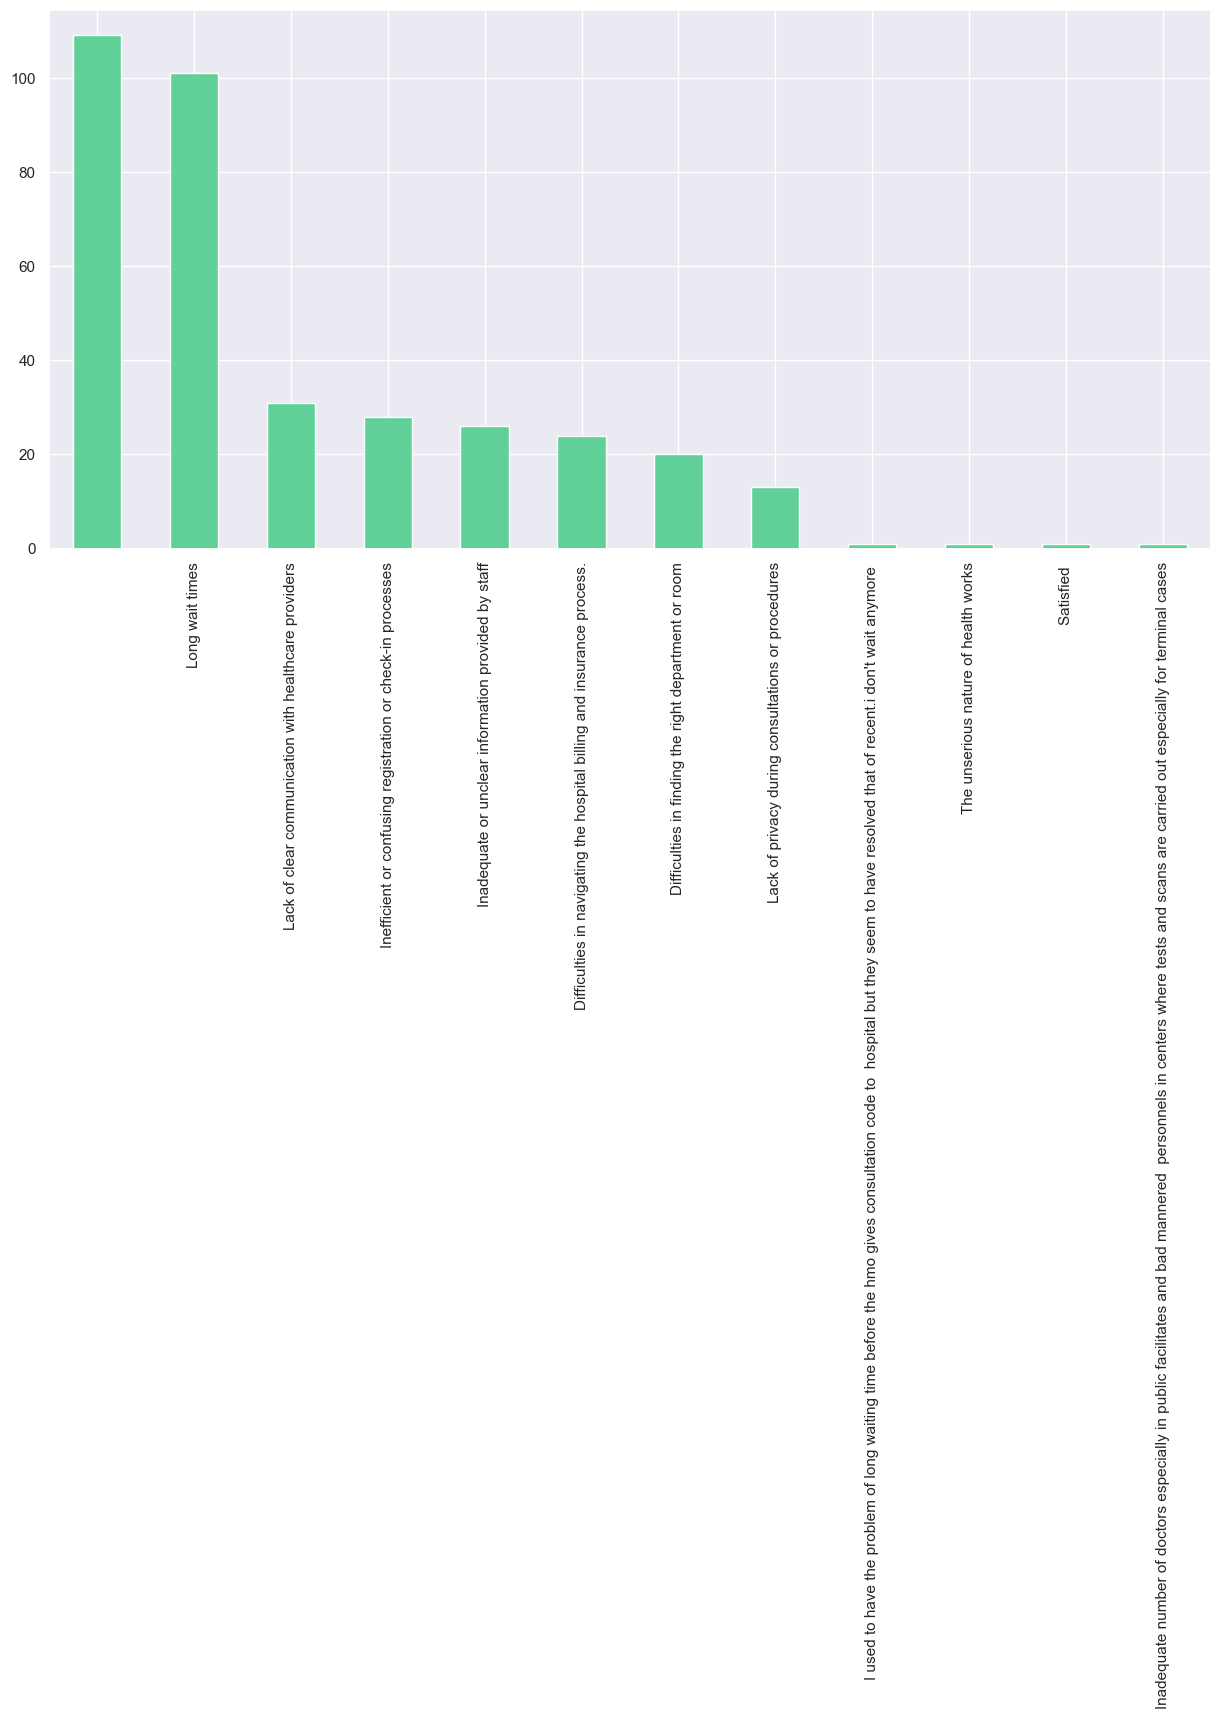

In [81]:
areas_to_improve_lists.stack().value_counts().plot(kind='bar', figsize=(15,7), color="#61d199")

### _Working with comments from users_

In [82]:
#install nltk library
#!pip install nltk 

In [83]:
#The first step of text analysis is to break sentenes into individual words to understand 
#the importance of each word with respect to the sentence, aka tokenization. 
#Import the necessary methods and downloads a few of nltk's resources to assist with tokenization

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Linda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
df['tok_registration_steps'] = df['registration_steps'].apply(word_tokenize)
df['tok_other_challenges'] = df['other_challenges'].apply(word_tokenize)
df['tok_expectations'] = df['expectations'].apply(word_tokenize)

### Registration steps during hospital visits

In [85]:
df['tok_registration_steps'].head(10)

0                                                [nan]
1                                                [nan]
2    [depends, on, the, hospitalYou, get, to, the, ...
3    [Putting, a, call, through, to, the, medical, ...
4    [Got, to, the, reception, ., Was, asked, to, f...
5    [Register, at, nurses, station, Wait, to, see,...
6    [Card, check-in, ,, consultation, and, adminis...
7    [First, ,, I, get, my, cardThen, my, vitals, a...
8    [Go, to, the, medical, records, first, then, g...
9                                                [nan]
Name: tok_registration_steps, dtype: object

In [86]:
all_registration_steps = []
for i in range(df.shape[0]):
    all_registration_steps = all_registration_steps + df['tok_registration_steps'][i]

In [87]:
from nltk.probability import FreqDist
fdist = FreqDist( all_registration_steps)
fdist

FreqDist({'the': 148, 'to': 127, ',': 109, 'for': 66, 'doctor': 66, 'and': 57, 'a': 46, '.': 37, 'card': 36, 'my': 36, ...})

In [88]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))
all_registration_steps_no_stopwords = [x for x in all_registration_steps if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Linda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
tokens_registration_steps = ''
for value in all_registration_steps_no_stopwords:
    tokens_registration_steps = tokens_registration_steps + value + ' '

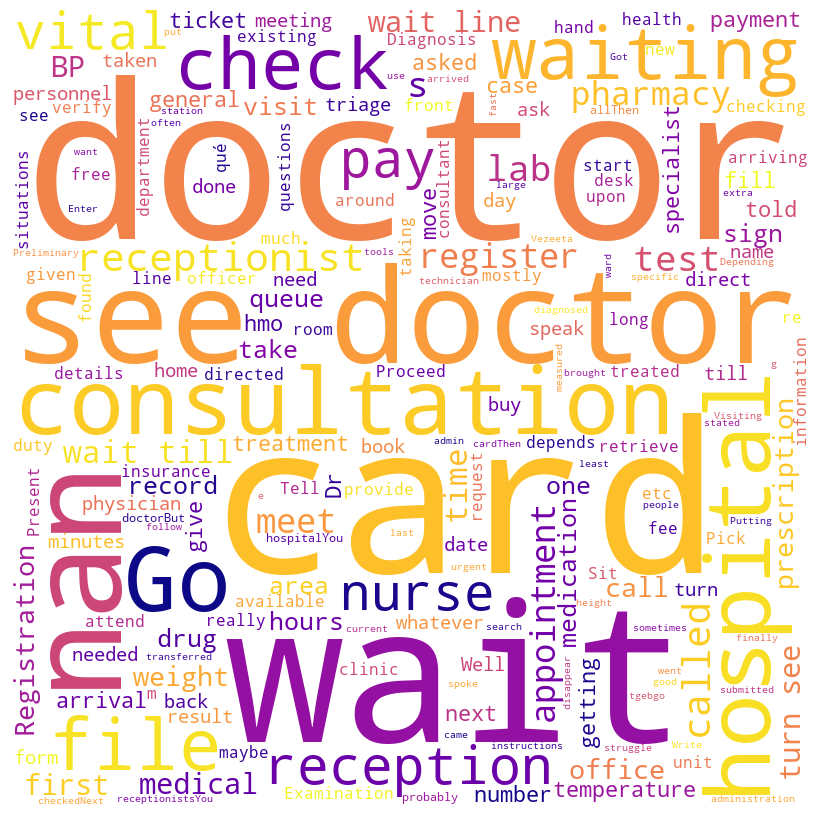

In [90]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap='plasma', 
                min_font_size = 10).generate(tokens_registration_steps) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [91]:
fdist1 = FreqDist(all_registration_steps_no_stopwords)
fdist1

FreqDist({',': 109, 'doctor': 66, '.': 37, 'card': 36, 'see': 30, 'wait': 30, 'nan': 29, 'get': 28, 'hospital': 24, 'consultation': 24, ...})

In [92]:
counts = pd.Series(fdist1)
counts = counts[:20]
counts.sort_values(ascending=False, inplace=True)
counts

,               109
card             36
see              30
wait             30
nan              29
get              28
hospital         24
reception        12
's               10
receptionist      9
general           4
hospitals         2
details           2
takes             2
mostly            2
probably          1
allThen           1
doctorBut         1
depends           1
hospitalYou       1
dtype: int64

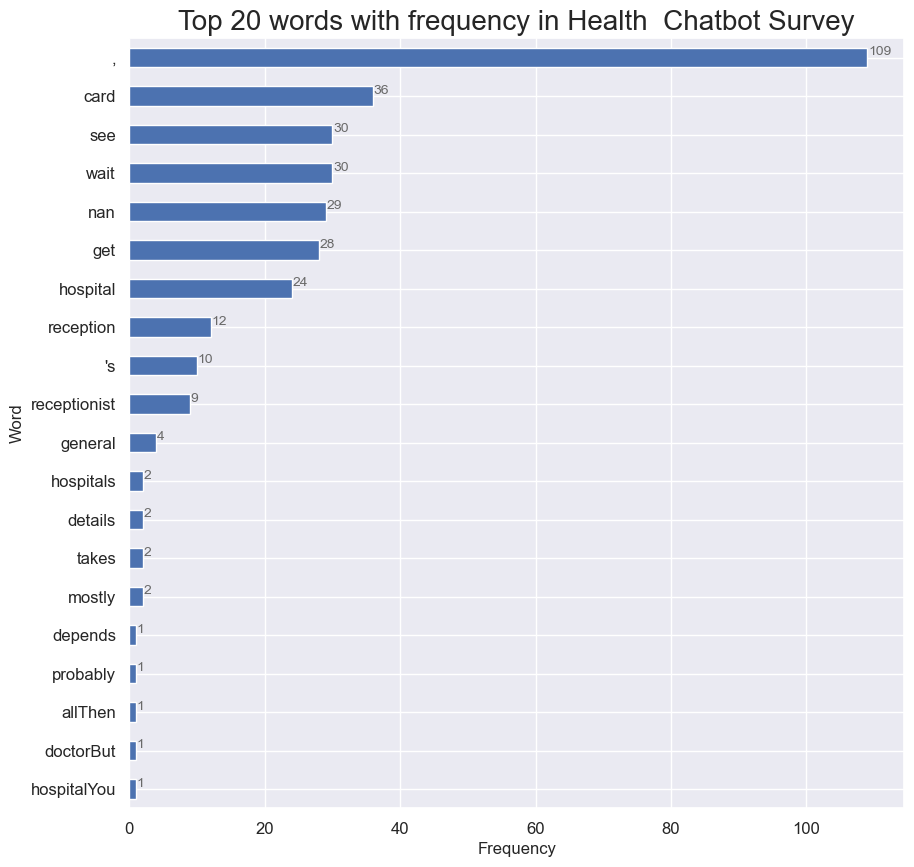

In [93]:
#Generates bar graph
ax = counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10), fontsize=12)

#X axis text and display style of categories
ax.set_xlabel("Frequency", fontsize=12)

#Y axis text
ax.set_ylabel("Word", fontsize=12)

#Title
ax.set_title("Top 20 words with frequency in Health  Chatbot Survey", fontsize=20)

#Annotations
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

### Other Challenges Experienced

In [115]:
df['other_challenges'].head(10)

0    Some healthcare professionals are quite rude a...
1                                                    .
2    Some stuff non-challant attitude especially th...
3    In some big government hospital, you have to t...
4          They seem to give hmo users cheaper drugs\n
5        Long process to reach out the medical doctor 
6    They don’t give drip\nI prefer drip than drugs...
7    Long wait for confirmation or approval from th...
8                  Arrogance of some non medical staff
9                  Insufficient health care providers.
Name: other_challenges, dtype: object

In [150]:
all_other_challenges = []
for i in range(df.shape[0]):
    all_other_challenges = all_other_challenges + df['tok_other_challenges'][i]

In [151]:
from nltk.probability import FreqDist
fdist2 = FreqDist( all_other_challenges)
fdist2

FreqDist({'the': 28, 'of': 26, '.': 21, 'to': 20, 'None': 11, 'and': 8, 'in': 8, ',': 8, 'a': 8, 'nan': 8, ...})

In [119]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))
all_other_challenges_no_stopwords = [x for x in all_other_challenges if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Linda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
tokens_other_challenges = ''
for value in all_other_challenges_no_stopwords:
    tokens_other_challenges = tokens_other_challenges + value + ' '

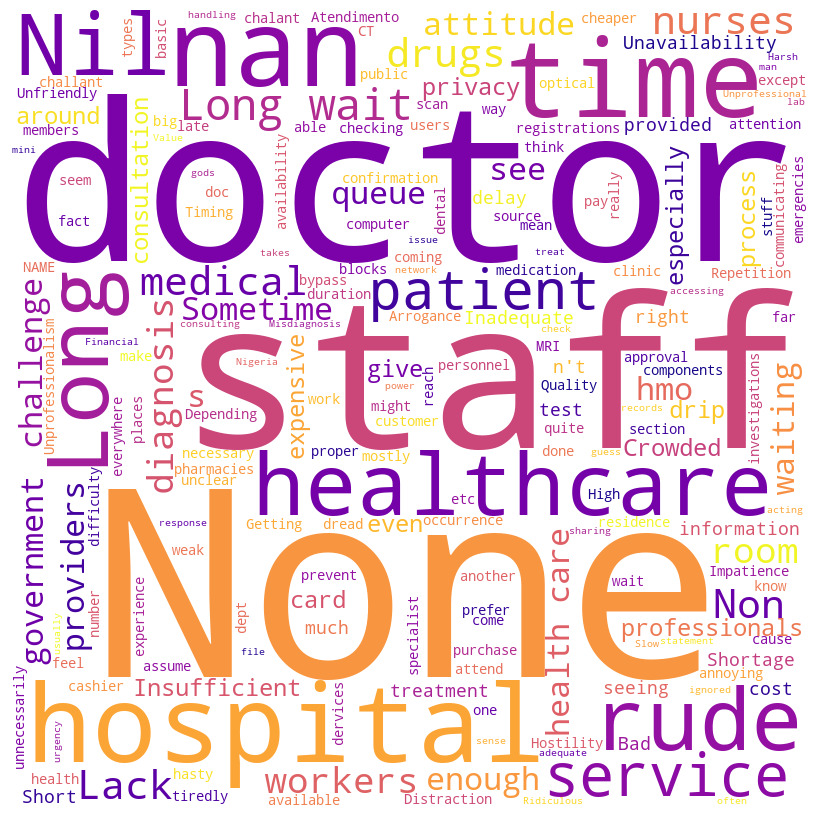

In [153]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap='plasma', 
                min_font_size = 10).generate(tokens_other_challenges) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [154]:
fdist3 = FreqDist(all_other_challenges_no_stopwords)
fdist3

FreqDist({'.': 21, 'None': 11, ',': 8, 'nan': 8, 'hospital': 7, 'wait': 7, 'healthcare': 6, 'Long': 6, 'staff': 6, 'Nil': 6, ...})

In [155]:
counts1 = pd.Series(fdist3)
counts1 = counts1[:20]
counts1.sort_values(ascending=False, inplace=True)
counts1

.                21
,                 8
hospital          7
healthcare        6
rude              4
government        3
attitude          3
professionals     2
especially        2
cashier           1
tiredly           1
big               1
dept              1
non-challant      1
stuff             1
coming            1
dread             1
make              1
quite             1
work              1
dtype: int64

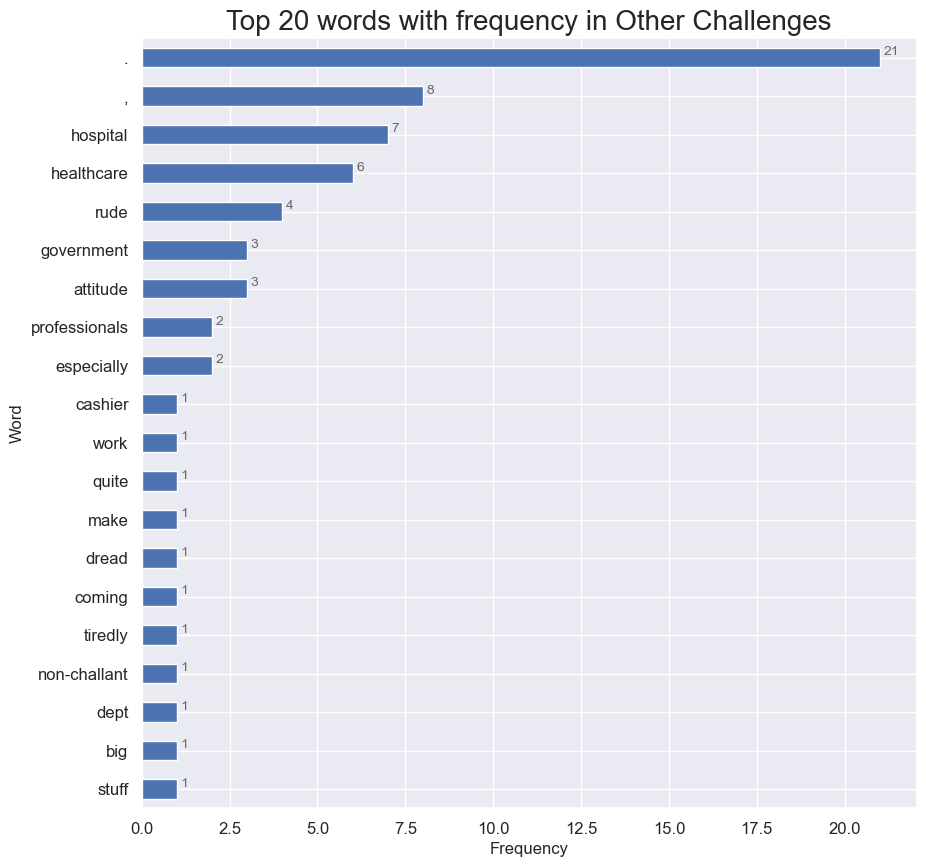

In [127]:
#Generates bar graph
ax = counts1.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10), fontsize=12)

#X axis text and display style of categories
ax.set_xlabel("Frequency", fontsize=12)

#Y axis text
ax.set_ylabel("Word", fontsize=12)

#Title
ax.set_title("Top 20 words with frequency in Other Challenges", fontsize=20)

#Annotations
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

### Chatbot expectations

In [128]:
df['tok_expectations'].head(10)

0                                                [nan]
1                                                [nan]
2                                                [nan]
3                                                [nan]
4                                                [nan]
5                                                [nan]
6                                                [nan]
7    [Quick, and, clear, response, and, the, abilit...
8                                                [nan]
9                                                [nan]
Name: tok_expectations, dtype: object

In [129]:
all_expectations = []
for i in range(df.shape[0]):
    all_expectations = all_expectations + df['tok_expectations'][i]

In [139]:
from nltk.probability import FreqDist
fdist4 = FreqDist(all_expectations)
fdist4

FreqDist({'nan': 84, 'and': 8, 'be': 8, 'to': 7, 'the': 4, 'a': 3, 'as': 3, 'doctor': 3, 'for': 3, 'I': 3, ...})

In [132]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))
all_expectations_no_stopwords = [x for x in all_expectations if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Linda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
tokens_expectations = ''
for value in all_expectations_no_stopwords:
    tokens_expectations = tokens_expectations + value + ' '

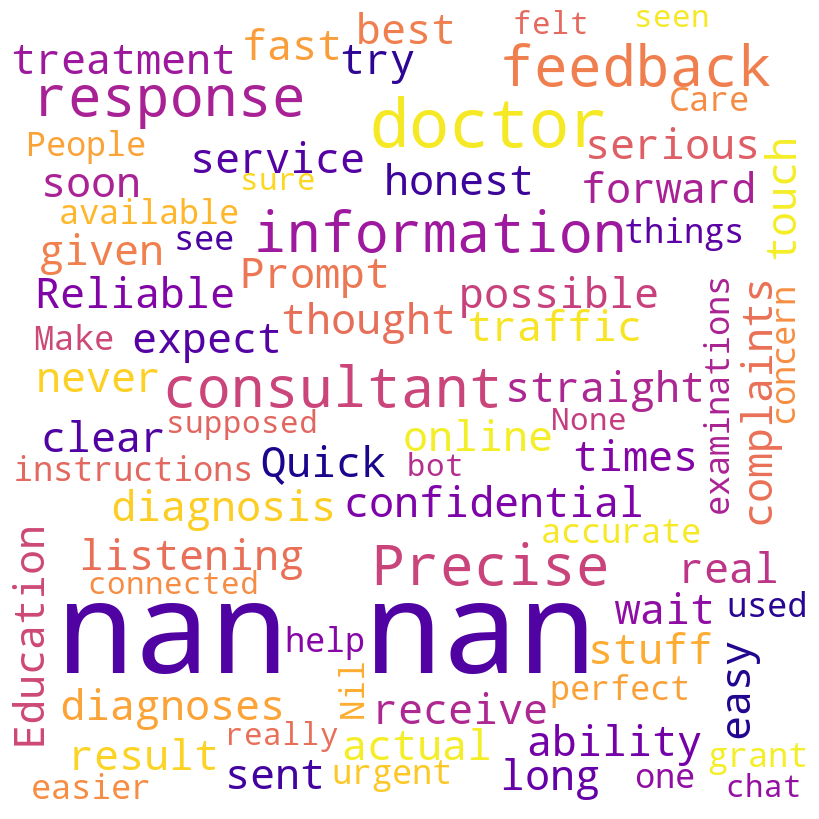

In [140]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap='plasma', 
                min_font_size = 10).generate(tokens_expectations) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [146]:
fdist5 = FreqDist(all_expectations_no_stopwords)
fdist5

FreqDist({'nan': 84, 'doctor': 3, 'response': 2, 'consultant': 2, 'information': 2, '.': 2, 'Precise': 2, 'Quick': 1, 'clear': 1, 'ability': 1, ...})

In [148]:
counts3 = pd.Series(fdist5)
counts3 = counts3[:20]
counts3.sort_values(ascending=False, inplace=True)
counts3

nan           84
doctor         3
response       2
consultant     2
sent           1
honest         1
diagnosis      1
fast           1
Prompt         1
diagnoses      1
online         1
possible       1
Quick          1
soon           1
real           1
touch          1
get            1
ability        1
clear          1
feedbacks      1
dtype: int64

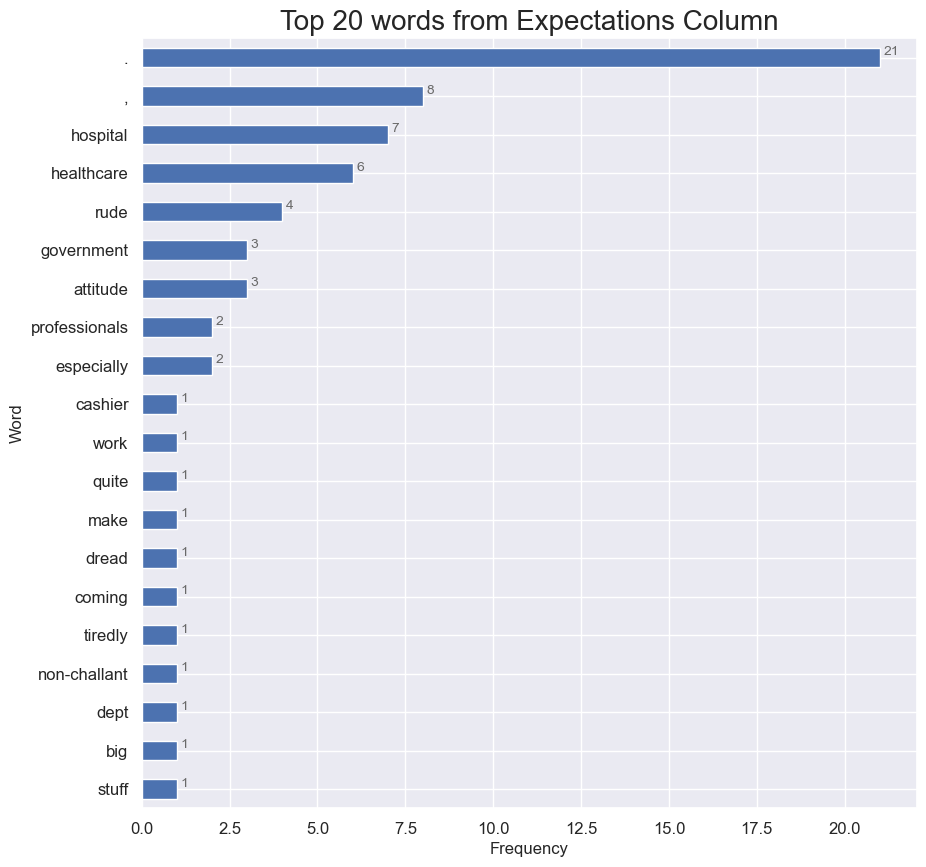

In [137]:
#Generates bar graph
ax = counts3.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10), fontsize=12)

#X axis text and display style of categories
ax.set_xlabel("Frequency", fontsize=12)

#Y axis text
ax.set_ylabel("Word", fontsize=12)

#Title
ax.set_title("Top 20 words from Expectations Column", fontsize=20)

#Annotations
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

## Conclusion and Recommendations